## [San Francisco Crime](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry) Data Analysis and Modeling

#### Structure
1. OLAP (Online analytical processing) using SparkSQL for scrime data analysis 
2. Unsupervised learning for spatial data analysis
3. Time series data prediction

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_color_codes("muted")
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# fetch data from SF gov
import urllib.request
# urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/sf.csv")

# save to db file system
# dbutils.fs.mv("file:/tmp/sf.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
# display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"

## 或者自己下载
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)

display(df_opt1)

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
4018830907041,040188309,07041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
13605159706372,136051597,06372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),32,1,10,20,8,2,9,28853,19,null,null,null,null,null,null,2,null,null,null,null,32
13618826906244,136188269,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),null,3,5,20,8,4,5,28853,19,null,null,null,3,null,null,2,null,null,3,null,null
4098938926105,040989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),49,7,8,38,1,5,4,59,38,null,null,null,null,null,null,1,null,null,null,null,49
5085058207021,050850582,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),66,9,1,28,9,7,6,28861,25,null,null,null,null,null,null,2,null,null,null,null,66
13085582009320,130855820,09320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),13,8,6,18,15,5,1,54,16,null,null,null,null,null,null,1,null,null,null,null,13
11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,1,null,null,null,null,86
5116515606241,051165156,06241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),103,4,11,15,15,6,11,29490,13,null,null,null,null,null,null,2,null,null,null,null,103
5099200968020,050992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),109,10,8,14,1,8,4,56,12,null,null,null,null,null,null,1,null,null,null,null,109
9118446702004,091184467,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),20,5,10,36,5,10,9,28852,36,null,null,null,null,null,null,2,1,1,null,null,20


In [0]:
# approach 1: udf + built-in
from pyspark.sql.functions import col, udf
from pyspark.sql.functions import expr
from pyspark.sql.functions import from_unixtime, to_date, hour, date_format
from datetime import datetime

month_func = udf(lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%m'), StringType())
date_func = udf(lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

df = df_opt1.withColumn('Month', month_func(col('Date')))\
          .withColumn('Date', to_date(col('Date'), "MM/dd/yy"))\
          .withColumn('Hour', hour(col('Time')))\
          .withColumn("Year", date_format(col("Date"), "Y"))\
          .withColumn('HasCriminal', (col("Category")!="NON-CRIMINAL"))\
          .withColumn("X",  col("X").cast("double"))\
          .withColumn("Y",  col("Y").cast("double"))
        # .withColumn('Date', date_func(col('Date')))\
display(df)

## approach 2.1: sql substring
# select Date, substring(Date,7) as Year, substring(Date,1,2) as Month from sf_crime

## approach 2.2: built-in + sql month
# df_update = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) ##change datetype from string to date
# df_update.createOrReplaceTempView("sf_crime")
# crimeYearMonth = spark.sql("SELECT Year(Date) AS Year, Month(Date) AS Month, FROM sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Month,Hour,Year,HasCriminal
4018830907041,040188309,07041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,2004-02-15,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90.0,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,02,2,2004,true
13605159706372,136051597,06372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,2013-03-14,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),32,1,10,20,8,2,9,28853,19,null,null,null,null,null,null,2,null,null,null,null,32,03,9,2013,true
13618826906244,136188269,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,2013-10-08,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),null,3,5,20,8,4,5,28853,19,null,null,null,3,null,null,2,null,null,3,null,null,10,19,2013,true
4098938926105,040989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,2004-08-29,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),49,7,8,38,1,5,4,59,38,null,null,null,null,null,null,1,null,null,null,null,49,08,22,2004,true
5085058207021,050850582,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,2005-07-29,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),66,9,1,28,9,7,6,28861,25,null,null,null,null,null,null,2,null,null,null,null,66,07,21,2005,true
13085582009320,130855820,09320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,2013-10-08,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),13,8,6,18,15,5,1,54,16,null,null,null,null,null,null,1,null,null,null,null,13,10,21,2013,true
11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,2011-11-13,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,1,null,null,null,null,86,11,10,2011,true
5116515606241,051165156,06241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,2005-10-15,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),103,4,11,15,15,6,11,29490,13,null,null,null,null,null,null,2,null,null,null,null,103,10,13,2005,true
5099200968020,050992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,2005-09-03,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),109,10,8,14,1,8,4,56,12,null,null,null,null,null,null,1,null,null,null,null,109,09,21,2005,true
9118446702004,091184467,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,2009-11-16,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),20,5,10,36,5,10,9,28852,36,null,null,null,null,null,null,2,1,1,null,null,20,11,12,2009,true


In [0]:
df.createOrReplaceTempView("sf_crime")

df.printSchema()
# df.describe().show()

root
-- PdId: string (nullable = true)
-- IncidntNum: string (nullable = true)
-- Incident Code: string (nullable = true)
-- Category: string (nullable = true)
-- Descript: string (nullable = true)
-- DayOfWeek: string (nullable = true)
-- Date: date (nullable = true)
-- Time: string (nullable = true)
-- PdDistrict: string (nullable = true)
-- Resolution: string (nullable = true)
-- Address: string (nullable = true)
-- X: double (nullable = true)
-- Y: double (nullable = true)
-- location: string (nullable = true)
-- SF Find Neighborhoods 2 2: string (nullable = true)
-- Current Police Districts 2 2: string (nullable = true)
-- Current Supervisor Districts 2 2: string (nullable = true)
-- Analysis Neighborhoods 2 2: string (nullable = true)
-- DELETE - Fire Prevention Districts 2 2: string (nullable = true)
-- DELETE - Police Districts 2 2: string (nullable = true)
-- DELETE - Supervisor Districts 2 2: string (nullable = true)
-- DELETE - Zip Codes 2 2: string (nullable = true)
-- DELETE - Neighborhoods 2 2: string (nullable = true)
-- DELETE - 2017 Fix It Zones 2 2: string (nullable = true)
-- Civic Center Harm Reduction Project Boundary 2 2: string (nullable = true)
-- Fix It Zones as of 2017-11-06 2 2: string (nullable = true)
-- DELETE - HSOC Zones 2 2: string (nullable = true)
-- Fix It Zones as of 2018-02-07 2 2: string (nullable = true)
-- CBD, BID and GBD Boundaries as of 2017 2 2: string (nullable = true)
-- Areas of Vulnerability, 2016 2 2: string (nullable = true)
-- Central Market/Tenderloin Boundary 2 2: string (nullable = true)
-- Central Market/Tenderloin Boundary Polygon - Updated 2 2: string (nullable = true)
-- HSOC Zones as of 2018-06-05 2 2: string (nullable = true)
-- OWED Public Spaces 2 2: string (nullable = true)
-- Neighborhoods 2: string (nullable = true)
-- Month: string (nullable = true)
-- Hour: integer (nullable = true)
-- Year: string (nullable = true)
-- HasCriminal: boolean (nullable = true)

### OLAP
##### 1. count the number of crimes for different category

In [0]:
# Spark Dataframe based
# df.groupBy('category').count().orderBy('count', ascending=False)

#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS count FROM sf_crime GROUP BY category ORDER BY count DESC")

display(crimeCategory)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


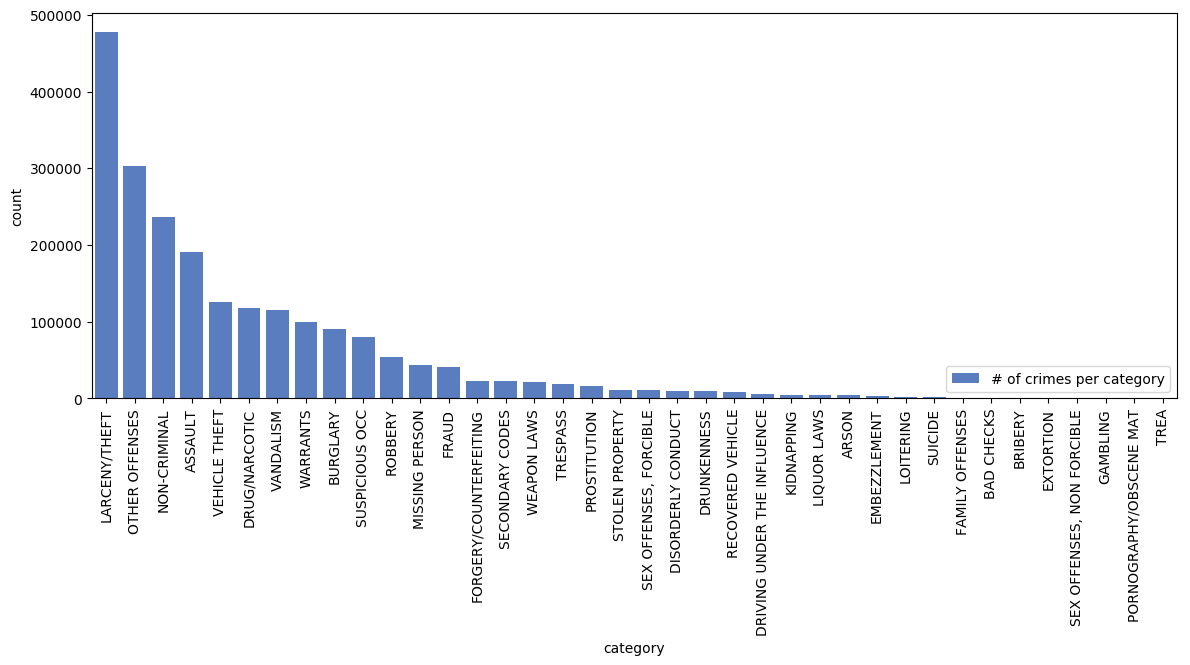

In [0]:
crimes_pd_df = crimeCategory.toPandas()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 5))

# Plot
sns.barplot(x="category", y="count", data=crimes_pd_df,
            label="# of crimes per category", color="b")

# Add a legend
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.xticks(rotation=90)

# using display to show figure
display(plt.show())

##### 2. count the number of crimes for different district

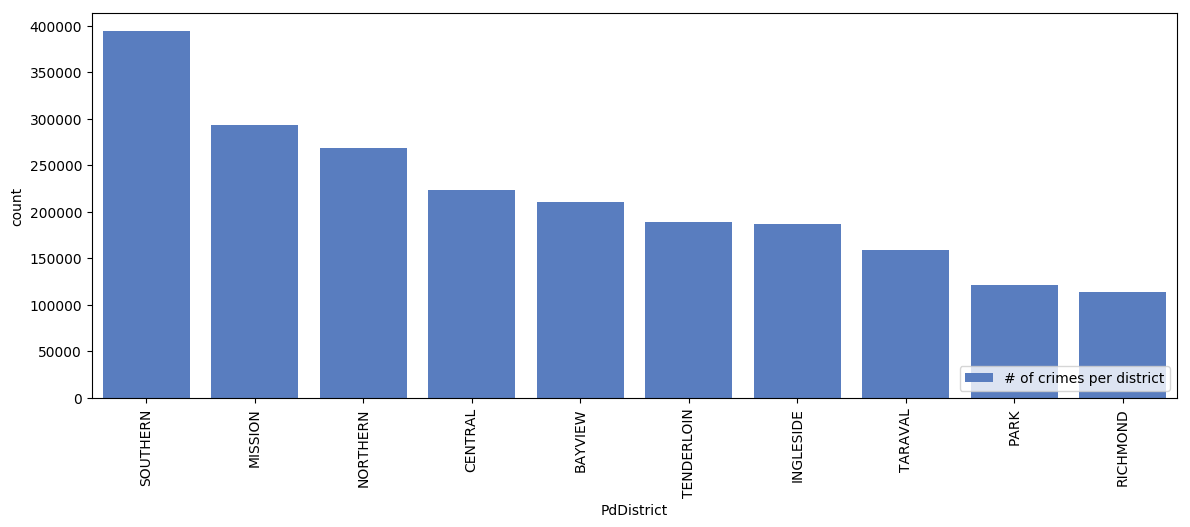

In [0]:
q2 = spark.sql("""
    SELECT PdDistrict, count(*) AS count
    FROM sf_crime
    GROUP BY PdDistrict
    ORDER BY count desc
""")

q2_df = q2.toPandas()

f, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x="PdDistrict", y="count", data=q2_df,
            label="# of crimes per district", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
plt.xticks(rotation=90)

display(plt.show())

##### 3. count the number of crimes each "Sunday" at "SF downtown" 
San Francisco X (longitude) and Y (Latitude) coordinates are: -122.431297, 37.773972. 

So spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740).

In [0]:
q3 = spark.sql("""
SELECT Date, COUNT(*) AS count
FROM
(
  SELECT *
  FROM sf_crime
  WHERE X BETWEEN -122.4313 AND -122.4213 AND Y BETWEEN 37.7540 AND 37.7740 AND DayOfWeek = 'Sunday'
 )
 GROUP BY Date
 ORDER BY Date
""")

q3_df = q3.toPandas()
q3_df.head()

,Date,count
0,2003-01-05,14
1,2003-01-12,20
2,2003-01-19,17
3,2003-01-26,13
4,2003-02-02,14


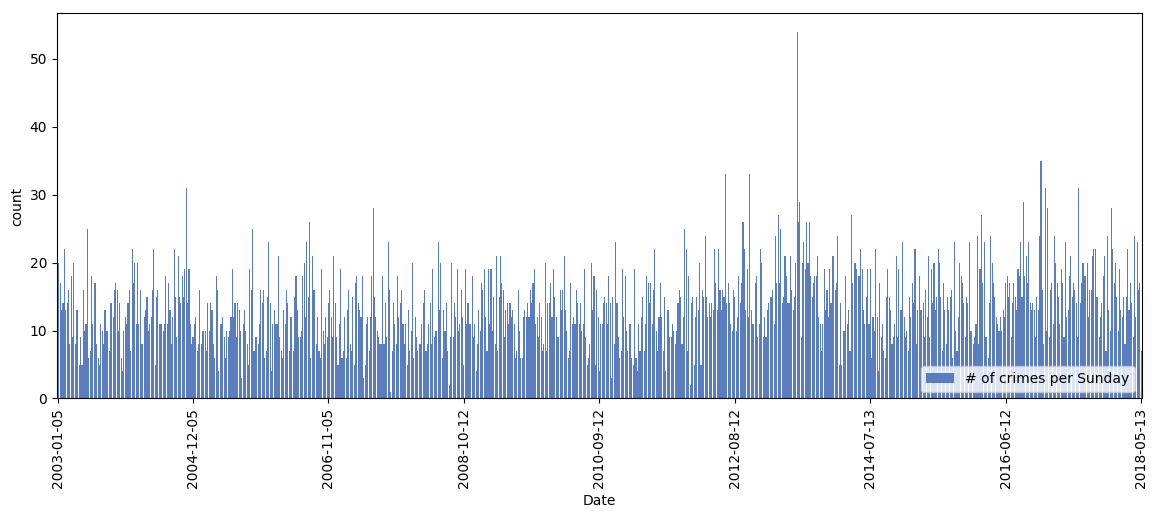

In [0]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

xs = range(q3_df.shape[0])
labels = q3_df['Date']

def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''
      
f, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x="Date", y="count", data=q3_df,
            label="# of crimes per Sunday", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=90)

display(plt.show())

##### 4. analise the number of crime in each month from 2015 to 2018

In [0]:
from pyspark.sql.functions import min, max

min_date, max_date = df.select(min("Date"), max("Date")).first()
min_date, max_date

Out[14]: (datetime.date(2003, 1, 1), datetime.date(2018, 5, 15))

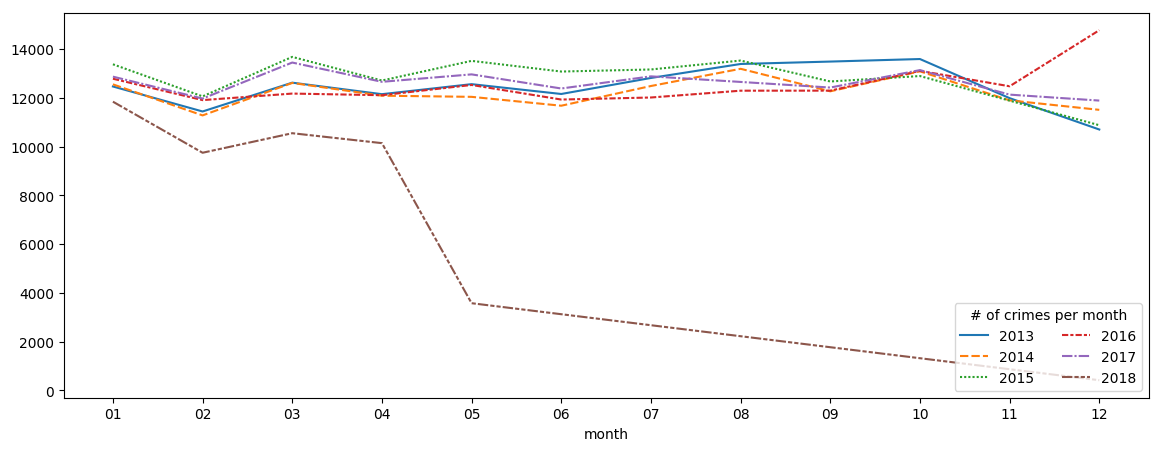

In [0]:
q4 = spark.sql("""
  SELECT year, month, count(*) AS num_crime
  FROM sf_crime
  GROUP BY year, month
  HAVING year IN (2013, 2014, 2015, 2016, 2017, 2018)
  ORDER BY year, month
""")

q4_df = q4.toPandas()

q4_pivot = q4_df.pivot(index='month', columns='year', values='num_crime')

f, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(data=q4_pivot)

ax.legend(title="# of crimes per month", ncol=2, loc="lower right", frameon=True)
display()

Insights:  

- The number of crime in 2018 significantly decreases compared to previous three years.
- Through online research, the reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

##### 5. analise the pattern of the number of crime w.r.t the hour in certian day
e.g. 2015/12/15, 2016/12/15, 2017/12/15.

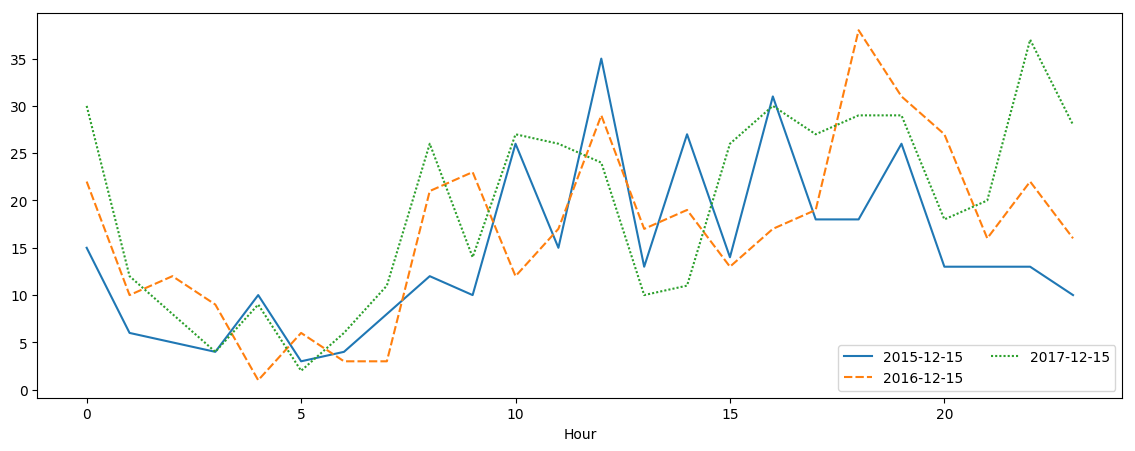

In [0]:
q5 = spark.sql("""
  (SELECT '2015-12-15' AS Date, HOUR(Time) as Hour, count(*) AS num_crime
  FROM sf_crime
  WHERE Date='2015-12-15'
  GROUP BY HOUR(Time)
  ORDER BY HOUR(Time))
  UNION
  (SELECT '2016-12-15' AS Date, HOUR(Time) as Hour, count(*) AS num_crime
  FROM sf_crime
  WHERE Date='2016-12-15'
  GROUP BY HOUR(Time)
  ORDER BY HOUR(Time))
  UNION
  (SELECT '2017-12-15' AS Date, HOUR(Time) as Hour, count(*) AS num_crime
  FROM sf_crime
  WHERE Date='2017-12-15'
  GROUP BY HOUR(Time)
  ORDER BY HOUR(Time))
  ORDER BY DATE, Hour
""")

q5_df = q5.toPandas()

q5_pivot = q5_df.pivot(index='Hour', columns='Date', values='num_crime')

f, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(data=q5_pivot)

ax.legend(ncol=2, loc="lower right", frameon=True)

# split into different charts
# g = sns.FacetGrid(q5_df, col="Date")
# g.map(sns.lineplot, "Hour", "num_crime")
# g.add_legend()

display()

Suggestions: 

There are two peak periods of crime, 12 o'clock and 18 o'clock. This time period is the time for tourists to eat and rest.  
Visitors are suggested not to relax their vigilance while resting.

##### 6. find the top-3 dangerous disricts and the crime event w.r.t category and time (hour)

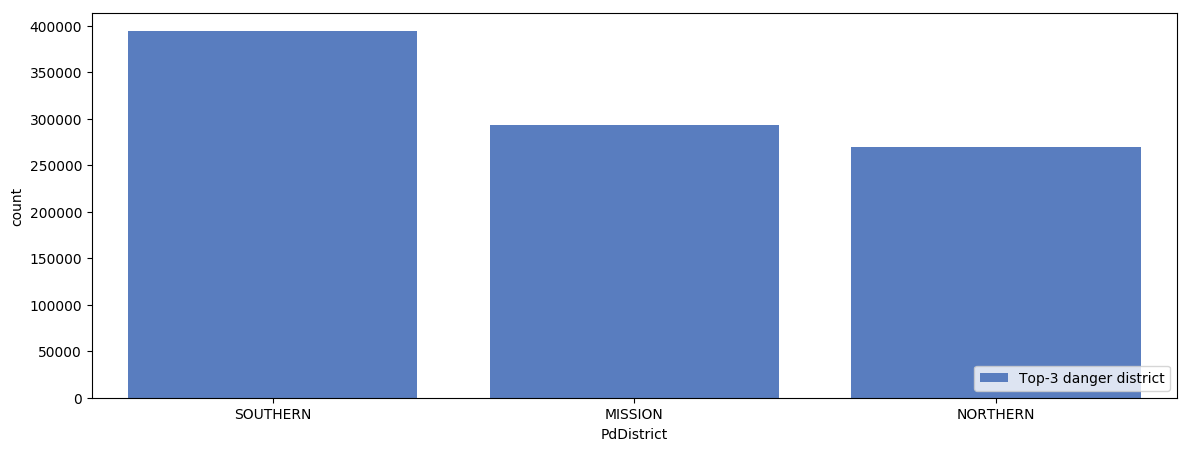

In [0]:
q6_1 = spark.sql("""
  SELECT PdDistrict, count(*) AS count
  FROM sf_crime
  GROUP BY PdDistrict
  ORDER BY count DESC
  LIMIT 3
""")

q6_1_df = q6_1.toPandas()

f, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x='PdDistrict', y='count', data=q6_1_df,
           label="Top-3 danger district", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
display()

In [0]:
sql_q = """
  SELECT HOUR(Time) AS Hour, Category, Count(*) AS num_crime
  FROM sf_crime
  WHERE PdDistrict IN {}
  GROUP BY HOUR(Time), Category
  ORDER BY Hour, Category
""".format(tuple(q6_1_df.PdDistrict))


q6_df = spark.sql(sql_q).toPandas()

q6_df_pv = pd.pivot_table(q6_df, index=['Hour'], columns=['Category'], values='num_crime', aggfunc=np.sum, fill_value=0)
q6_df_pv

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,SECONDARY CODES,"SEX OFFENSES, FORCIBLE","SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,84,4675,79,20,1585,301,272,1757,400,280,29,16,1644,2489,13,125,10082,86,48,784,5203,7649,1,1107,138,1400,519,625,47,297,12,2174,0,260,2654,1568,1933,466
1,77,4310,3,11,1064,225,274,1156,369,4,4,8,92,414,1,112,6644,34,38,355,2948,3911,0,819,103,1534,318,262,3,219,13,999,0,180,1916,1129,1413,354
2,84,3837,2,12,1152,212,263,947,294,4,3,6,64,283,0,108,4065,27,24,271,2335,3283,0,630,77,1749,293,268,1,165,13,872,0,241,1780,889,1212,323
3,95,1846,0,6,1229,140,117,607,128,6,2,2,61,160,1,68,2419,13,27,162,1443,2334,1,422,84,988,197,196,0,143,9,628,0,174,1223,552,950,199
4,74,1127,2,5,1032,100,40,444,55,4,2,1,35,103,0,37,1542,11,14,107,1065,1746,0,328,59,643,127,105,1,115,4,414,0,138,798,440,674,142
5,60,889,1,2,948,163,27,216,20,4,4,3,25,85,1,35,1490,3,28,149,1018,1214,0,429,43,486,109,67,2,94,9,297,1,213,697,392,459,74
6,50,1216,2,2,858,396,27,678,31,6,3,4,69,178,0,31,2478,24,49,239,1939,1744,1,414,35,456,115,74,4,96,13,533,1,450,782,635,792,98
7,28,1743,3,4,998,451,19,1440,79,17,7,4,141,330,3,45,3780,47,71,533,2916,3527,0,210,138,370,179,100,2,146,13,802,0,623,932,1049,1613,197
8,34,2578,24,6,1669,362,18,1847,78,89,9,16,494,829,5,52,6278,61,85,879,4563,5401,1,117,131,478,284,232,6,180,24,1335,0,582,1347,1548,2000,236


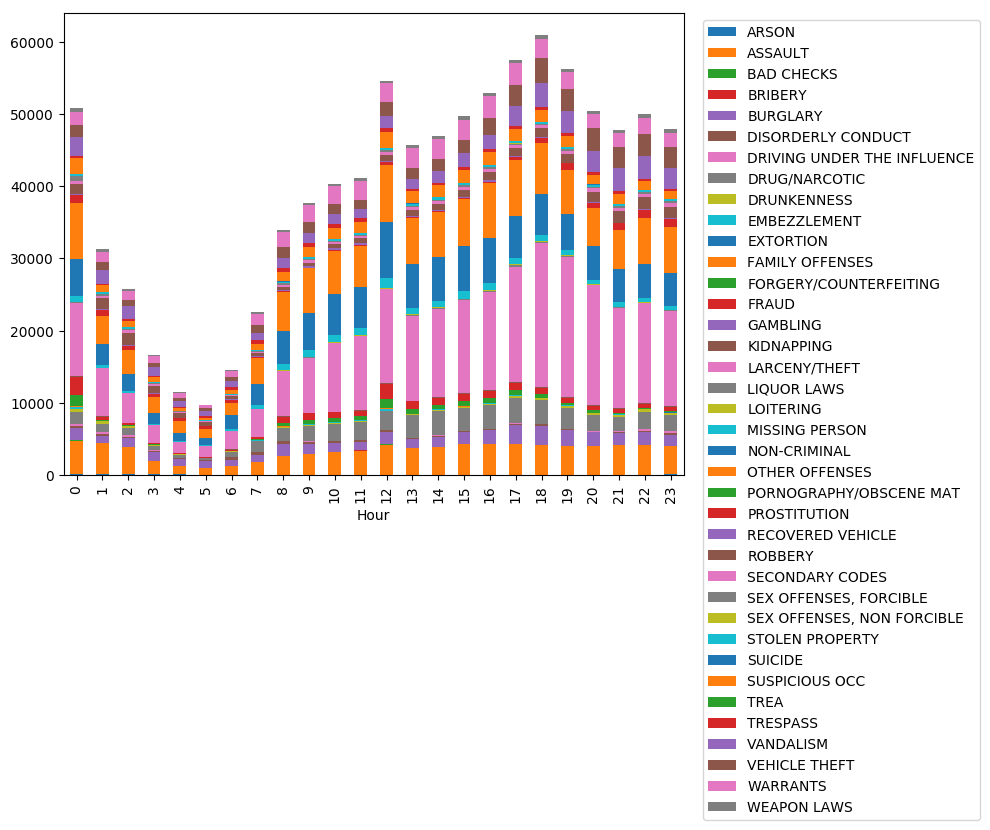

In [0]:
f, ax = plt.subplots(figsize=(8, 6))

q6_df_pv.plot.bar(stacked=True, ax=ax)

legend = ax.legend(loc="upper left", bbox_to_anchor=(1.02, 0, 0.07, 1))

display()

Insights:

The three most dangerous districts are SOUTHERN, MISSION and NORTHERN, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, the top crime category is LARCENY/THEFT.

Advice to distribute the police:

Police should increase police patrol during this time period: 12pm and 18pm.

##### 7. find the percentage of resolution for different category of crime

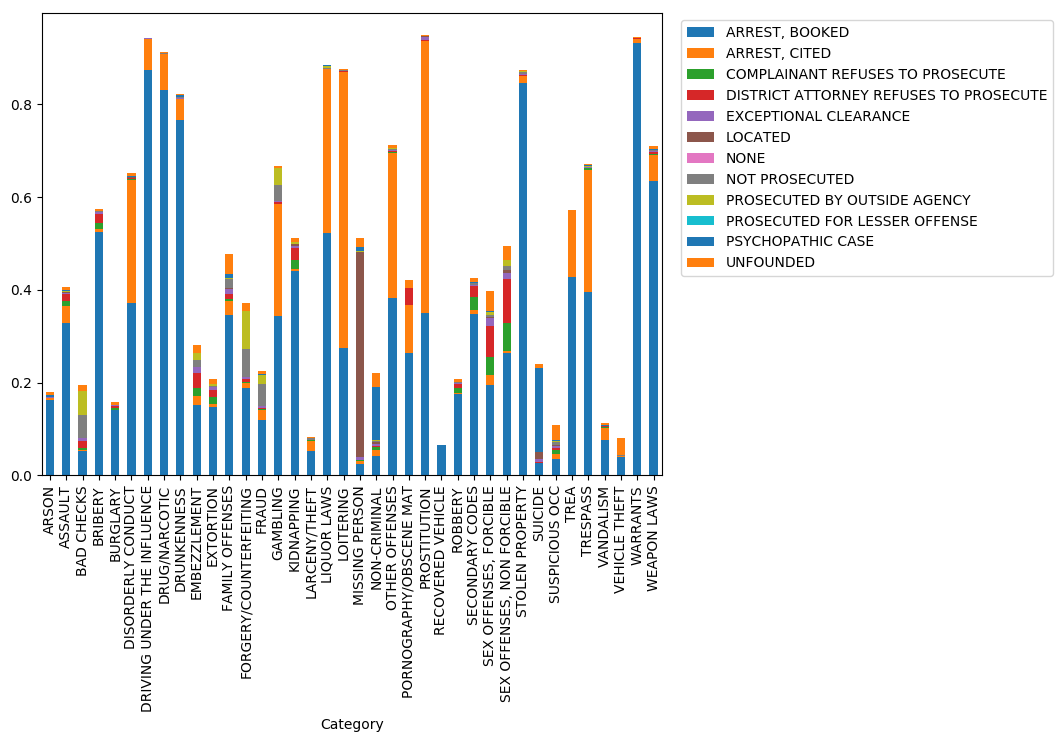

In [0]:
sql_q = """
  SELECT Category, Resolution, num_crime, 
        SUM(num_crime) OVER(PARTITION BY Category) AS total_crimes_by_category
  FROM
  (
    SELECT Category, Resolution, 
            Count(*) AS num_crime
    FROM sf_crime
    GROUP BY Category, Resolution
    ORDER BY Category, Resolution
   )
"""

q7_df = spark.sql(sql_q).toPandas()

q7_df['resolution_rate'] = q7_df[q7_df['Resolution']!='NONE']['num_crime'].div(q7_df['total_crimes_by_category'], axis=0)

f, ax = plt.subplots(figsize=(8, 6))

q7_df.pivot(index='Category', columns='Resolution', values='resolution_rate').fillna(0).reset_index().plot.bar(x='Category', stacked=True, ax=ax)

legend = ax.legend(loc="upper left", bbox_to_anchor=(1.02, 0, 0.07, 1))

display()

In [0]:
category_ls = q7_df.Category.unique()
num_charts = 4
num_groups = len(category_ls)//num_charts
chart_groups = [category_ls[i*num_charts:(i+1)*num_charts] for i in range(num_groups)]
chart_groups.append(category_ls[num_groups*num_charts :])

display(q7_df[q7_df.Category.isin(chart_groups[0])])

Category,Resolution,num_crime,total_crimes_by_category,resolution_rate
FRAUD,"ARREST, BOOKED",4940,41348,0.11947373512624553
FRAUD,"ARREST, CITED",921,41348,0.02227435426139112
FRAUD,COMPLAINANT REFUSES TO PROSECUTE,46,41348,0.0011125084647383187
FRAUD,DISTRICT ATTORNEY REFUSES TO PROSECUTE,130,41348,0.0031440456612169877
FRAUD,EXCEPTIONAL CLEARANCE,129,41348,0.0031198606945922413
FRAUD,LOCATED,7,41348,1.692947663732224E-4
FRAUD,NONE,32057,41348,null
FRAUD,NOT PROSECUTED,1940,41348,0.04691883525200735
FRAUD,PROSECUTED BY OUTSIDE AGENCY,881,41348,0.021306955596401278
FRAUD,PROSECUTED FOR LESSER OFFENSE,2,41348,4.8369933249492114E-5


In [0]:
display(q7_df[q7_df.Category.isin(chart_groups[1])])

Category,Resolution,num_crime,total_crimes_by_category,resolution_rate
FAMILY OFFENSES,"ARREST, BOOKED",320,926,0.34557235421166305
FAMILY OFFENSES,"ARREST, CITED",29,926,0.03131749460043196
FAMILY OFFENSES,COMPLAINANT REFUSES TO PROSECUTE,4,926,0.004319654427645789
FAMILY OFFENSES,DISTRICT ATTORNEY REFUSES TO PROSECUTE,9,926,0.009719222462203024
FAMILY OFFENSES,EXCEPTIONAL CLEARANCE,11,926,0.011879049676025918
FAMILY OFFENSES,LOCATED,2,926,0.0021598272138228943
FAMILY OFFENSES,NONE,484,926,null
FAMILY OFFENSES,NOT PROSECUTED,17,926,0.0183585313174946
FAMILY OFFENSES,PROSECUTED BY OUTSIDE AGENCY,3,926,0.0032397408207343412
FAMILY OFFENSES,PSYCHOPATHIC CASE,8,926,0.008639308855291577


In [0]:
display(q7_df[q7_df.Category.isin(chart_groups[2])])

Category,Resolution,num_crime,total_crimes_by_category,resolution_rate
WARRANTS,"ARREST, BOOKED",93092,99821,0.932589334909488
WARRANTS,"ARREST, CITED",885,99821,0.00886586990713377
WARRANTS,COMPLAINANT REFUSES TO PROSECUTE,21,99821,2.1037657406758098E-4
WARRANTS,DISTRICT ATTORNEY REFUSES TO PROSECUTE,36,99821,3.606455555444245E-4
WARRANTS,EXCEPTIONAL CLEARANCE,30,99821,3.005379629536871E-4
WARRANTS,LOCATED,34,99821,3.40609691347512E-4
WARRANTS,NONE,5482,99821,null
WARRANTS,NOT PROSECUTED,18,99821,1.8032277777221226E-4
WARRANTS,PROSECUTED BY OUTSIDE AGENCY,43,99821,4.307710802336182E-4
WARRANTS,PROSECUTED FOR LESSER OFFENSE,12,99821,1.2021518518147484E-4


In [0]:
display(q7_df[q7_df.Category.isin(chart_groups[3])])

Category,Resolution,num_crime,total_crimes_by_category,resolution_rate
BRIBERY,"ARREST, BOOKED",418,796,0.5251256281407035
BRIBERY,"ARREST, CITED",5,796,0.00628140703517588
BRIBERY,COMPLAINANT REFUSES TO PROSECUTE,11,796,0.013819095477386936
BRIBERY,DISTRICT ATTORNEY REFUSES TO PROSECUTE,15,796,0.018844221105527637
BRIBERY,EXCEPTIONAL CLEARANCE,3,796,0.0037688442211055275
BRIBERY,NONE,338,796,null
BRIBERY,NOT PROSECUTED,1,796,0.001256281407035176
BRIBERY,UNFOUNDED,5,796,0.00628140703517588
ASSAULT,"ARREST, BOOKED",62809,191384,0.32818312920620324
ASSAULT,"ARREST, CITED",7177,191384,0.03750052250971868


Insights:
- The top four categories of crimes resolved are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.
- The categories which less than 10% of crimes resolved are RECOVERED VEHICLE, VEHICLE THEFT, and LARCENY/THEFT.

Suggestions:

It is suggested that police should pay more attention to theft crimes.

### Clustering
Apply Spark ML custering algorithm to cluster the spatial data.

In [0]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans

crime_cluster_df = df.where("hasCriminal =true").select(["Hour", "PdDistrict", "X","Y", "DayOfWeek", "category","Resolution","hasCriminal"])

display(crime_cluster_df)

Hour,PdDistrict,X,Y,DayOfWeek,category,Resolution,hasCriminal
2,SOUTHERN,-120.5,90.0,Sunday,VEHICLE THEFT,NONE,true
9,SOUTHERN,-122.421594519119,37.7707674171464,Thursday,LARCENY/THEFT,NONE,true
19,MISSION,-122.422367409563,37.7698682392455,Tuesday,LARCENY/THEFT,NONE,true
22,PARK,-122.452716700987,37.7457451434135,Sunday,OTHER OFFENSES,NONE,true
21,INGLESIDE,-122.448127287476,37.7121636146229,Friday,VEHICLE THEFT,NONE,true
21,PARK,-122.446612978839,37.7822458223917,Tuesday,FRAUD,NONE,true
10,BAYVIEW,-122.388456834121,37.7429830266541,Sunday,OTHER OFFENSES,"ARREST, CITED",true
13,RICHMOND,-122.439874051516,37.7852471617589,Saturday,LARCENY/THEFT,NONE,true
21,TARAVAL,-122.469264894685,37.7592163037102,Saturday,OTHER OFFENSES,NONE,true
12,TENDERLOIN,-122.412999075009,37.786277459166,Monday,"SEX OFFENSES, FORCIBLE",DISTRICT ATTORNEY REFUSES TO PROSECUTE,true


In [0]:
bounds = {
    c: dict(
        zip(["q1", "q3"], crime_cluster_df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in crime_cluster_df.select(["X","Y"]).columns
}
 
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)

crime_cluster_df = crime_cluster_df.select(["X","Y"]).where(col("X").between(bounds['X']['lower'], bounds['X']['upper'])).where(col("Y").between(bounds['Y']['lower'], bounds['Y']['upper']))

In [0]:
# ensemble multiple columns into one single feature column for training KMean Clustering
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
crime_cluster_df = vecAssembler.transform(crime_cluster_df.select(["X","Y"]))

In [0]:
from pyspark.ml.clustering import KMeans

# 5 clusters
K = 5
kmeans = KMeans(k=K)
model = kmeans.fit(crime_cluster_df.select('features'))

transformed = model.transform(crime_cluster_df)
transformed.show() 

+-----------------+----------------+--------------------+----------+
 X| Y| features|prediction|
+-----------------+----------------+--------------------+----------+
-122.421594519119|37.7707674171464|[-122.42159451911...| 4|
-122.422367409563|37.7698682392455|[-122.42236740956...| 4|
-122.452716700987|37.7457451434135|[-122.45271670098...| 0|
-122.448127287476|37.7121636146229|[-122.44812728747...| 0|
-122.446612978839|37.7822458223917|[-122.44661297883...| 3|
-122.388456834121|37.7429830266541|[-122.38845683412...| 1|
-122.439874051516|37.7852471617589|[-122.43987405151...| 3|
-122.469264894685|37.7592163037102|[-122.46926489468...| 3|
-122.412999075009| 37.786277459166|[-122.41299907500...| 2|
-122.411141948108| 37.785073619727|[-122.41114194810...| 2|
 -122.39510178235|37.7483896990887|[-122.39510178235...| 1|
-122.412838554019|37.7509678760759|[-122.41283855401...| 4|
-122.403366417112|37.7899452996011|[-122.40336641711...| 2|
-122.413790972781|37.7838365565348|[-122.41379097278...| 2|
-122.420120319204|37.7877570602411|[-122.42012031920...| 2|
 -122.41316085097|37.7774566611807|[-122.41316085097...| 2|
-122.418188741803|37.7391675809035|[-122.41818874180...| 4|
-122.426955631709| 37.769247063207|[-122.42695563170...| 4|
-122.430798473756|37.7825695563107|[-122.43079847375...| 3|
-122.376900658814|37.7294874636559|[-122.37690065881...| 1|
+-----------------+----------------+--------------------+----------+
only showing top 20 rows

In [0]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = model.computeCost(crime_cluster_df)
print("Within Set Sum of Squared Errors = " + str(wssse))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 330.3459472701068
Cluster Centers: 
[-122.44334349 37.72424523]
[-122.39555754 37.73206678]
[-122.41012923 37.7859335 ]
[-122.44416809 37.77946347]
[-122.41800937 37.76059989]

In [0]:
display(transformed.select(["Y","X", "prediction"]))

Y,X,prediction
37.7707674171464,-122.421594519119,4
37.7698682392455,-122.422367409563,4
37.7457451434135,-122.452716700987,0
37.7121636146229,-122.448127287476,0
37.7822458223917,-122.446612978839,3
37.7429830266541,-122.388456834121,1
37.7852471617589,-122.439874051516,3
37.7592163037102,-122.469264894685,3
37.786277459166,-122.412999075009,2
37.785073619727,-122.411141948108,2


### Time series analysis

In [0]:
crime_count = spark.sql("""
  SELECT date, COUNT(*) AS num_crime
  FROM sf_crime
  GROUP BY Date
  ORDER BY Date
""").toPandas()

display(crime_count)

date,num_crime
2003-01-01,609
2003-01-02,390
2003-01-03,425
2003-01-04,333
2003-01-05,373
2003-01-06,397
2003-01-07,406
2003-01-08,515
2003-01-09,406
2003-01-10,383


In [0]:
crime_count.date = pd.to_datetime(crime_count.date)
crime_count = crime_count.set_index('date')

crime_count['num_crime'] = crime_count['num_crime'].apply(pd.to_numeric, errors='ignore')

crime_count.tail(20)

,num_crime
date,
2018-04-26,328
2018-04-27,362
2018-04-28,369
2018-04-29,294
2018-04-30,294
2018-05-01,272
2018-05-02,333
2018-05-03,309
2018-05-04,331


In [0]:
# remove data in May as it is incomplete data
crime_count = crime_count[crime_count.index < '2018-05-01']
crime_count.tail()

,num_crime
date,
2018-04-26,328
2018-04-27,362
2018-04-28,369
2018-04-29,294
2018-04-30,294


In [0]:
df_week = crime_count.resample('W-MON').mean()
df_month = crime_count.resample('M').mean()
df_quater = crime_count.resample('Q-DEC').mean()
# df_year = crime_count.resample('A-DEC').mean()

df_week.head()

,num_crime
date,
2003-01-06,421.166667
2003-01-13,395.000000
2003-01-20,380.714286
2003-01-27,414.142857
2003-02-03,415.285714


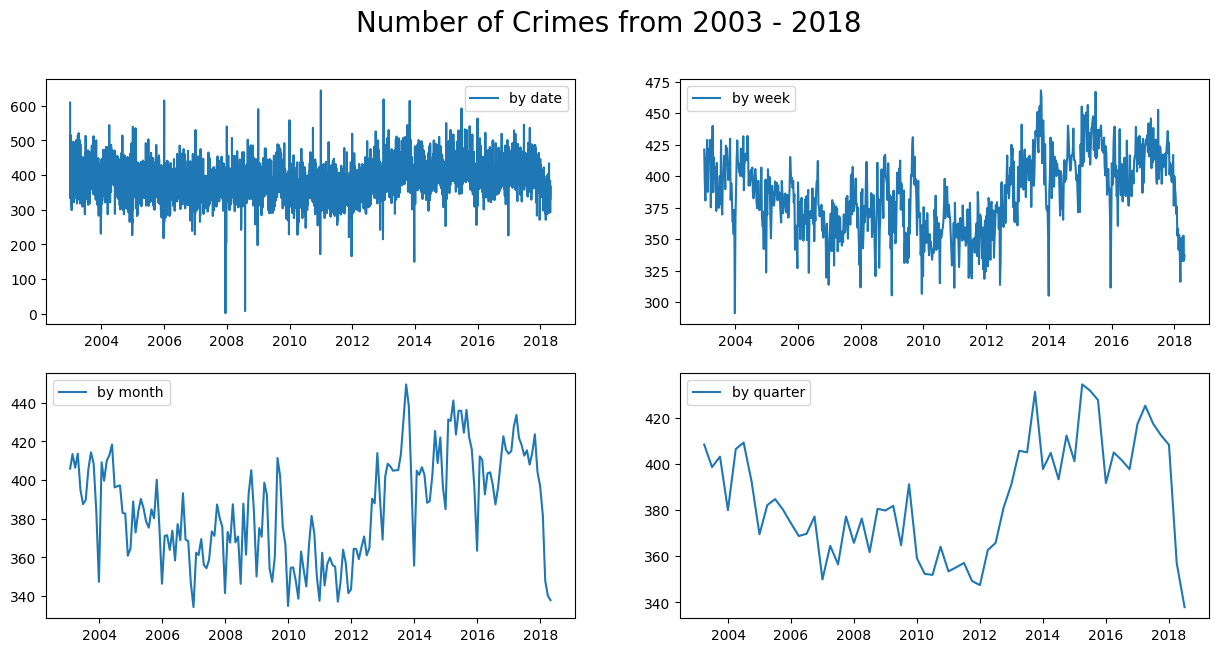

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=[15, 7])

plt.suptitle('Number of Crimes from 2003 - 2018', fontsize=20)

plt.subplot(221)
plt.plot(crime_count.num_crime, '-', label='by date')
plt.legend()

plt.subplot(222)
plt.plot(df_week.num_crime, '-', label='by week')
plt.legend()

plt.subplot(223)
plt.plot(df_month.num_crime, '-', label='by month')
plt.legend()

plt.subplot(224)
plt.plot(df_quater.num_crime, '-', label='by quarter')
plt.legend()


display()

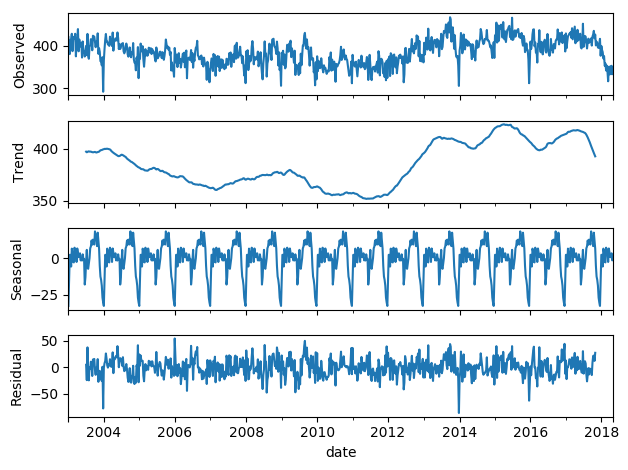

In [0]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

result = sm.tsa.seasonal_decompose(df_week.num_crime)
result.plot()
display()

In [0]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_week.iloc[:,0].values)

Out[96]: (-4.7842299040843566,
 5.829239571868185e-05,
 3,
 796,
 {'1%': -3.4385918508847646,
 '5%': -2.865177791819505,
 '10%': -2.568707096601096},
 6813.100014061874)

No need for differencing as data is staionary.

In [0]:
test_start_date = '2017-01-01'

train = df_week[df_week.index<test_start_date]
test = df_week[df_week.index>=test_start_date]

print("number of training examples: ",train.shape[0])
print("number of test examples: ", test.shape[0])

# train: '2003-01-06' ~ '2017-12-25', 
# test: '2018-01-01' ~ '2018-04-30'
train.tail()

,num_crime
date,
2016-11-28,406.857143
2016-12-05,415.285714
2016-12-12,411.857143
2016-12-19,425.571429
2016-12-26,386.857143


In [0]:
test.head()

,num_crime
date,
2017-01-02,429.714286
2017-01-09,394.714286
2017-01-16,410.428571
2017-01-23,422.857143
2017-01-30,425.285714


In [0]:
test_start_date = '2017-01-02'

In [0]:
from itertools import product
from statsmodels.tsa.arima_model import ARMA, ARIMA
# GridSearch for parameters, p,d,q
ps = range(0, 7)
qs = range(0, 7)
ds = range(0, 1)

parameters = product(ps, ds, qs)
parameters_list = list(parameters)

# find optimal parameters for ARIMA, which means giving smallest aic
results = []
best_aic = float("inf") 

for param in parameters_list:
    try:
        model = ARIMA(train.num_crime,order=(param[0], param[1], param[2])).fit()

    except ValueError:
        print('param error:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
# print out best model
print('best parameter: ', best_param)
print('best model: ', best_model.summary())

param error: (3, 0, 5)
param error: (3, 0, 6)
param error: (4, 0, 5)
param error: (4, 0, 6)
/databricks/python/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
 'available', HessianInversionWarning)
param error: (5, 0, 6)
/databricks/python/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
 'available', HessianInversionWarning)
best parameter: (4, 0, 4)
best model: ARMA Model Results 
==============================================================================
Dep. Variable: num_crime No. Observations: 730
Model: ARMA(4, 4) Log Likelihood -3196.231
Method: css-mle S.D. of innovations 19.265
Date: Mon, 27 Sep 2021 AIC 6412.463
Time: 23:42:11 BIC 6458.393
Sample: 01-06-2003 HQIC 6430.183
 - 12-26-2016 
===================================================================================
 coef std err z P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
const 389.7883 12.017 32.438 0.000 366.236 413.340
ar.L1.num_crime 0.3038 0.083 3.672 0.000 0.142 0.466
ar.L2.num_crime 1.0795 0.056 19.386 0.000 0.970 1.189
ar.L3.num_crime 0.2987 0.116 2.580 0.010 0.072 0.526
ar.L4.num_crime -0.6858 0.082 -8.391 0.000 -0.846 -0.526
ma.L1.num_crime 0.0731 0.091 0.803 0.422 -0.105 0.252
ma.L2.num_crime -0.8261 0.048 -17.034 0.000 -0.921 -0.731
ma.L3.num_crime -0.5990 0.088 -6.834 0.000 -0.771 -0.427
ma.L4.num_crime 0.4255 0.067 6.307 0.000 0.293 0.558
 Roots 
=============================================================================
 Real Imaginary Modulus Frequency
-----------------------------------------------------------------------------
AR.1 -0.8957 -0.6203j 1.0895 -0.4036
AR.2 -0.8957 +0.6203j 1.0895 0.4036
AR.3 1.0065 -0.0000j 1.0065 -0.0000
AR.4 1.2205 -0.0000j 1.2205 -0.0000
MA.1 -0.8387 -0.6320j 1.0502 -0.3972
MA.2 -0.8387 +0.6320j 1.0502 0.3972
MA.3 1.0439 -0.0000j 1.0439 -0.0000
MA.4 2.0413 -0.0000j 2.0413 -0.0000
-----------------------------------------------------------------------------

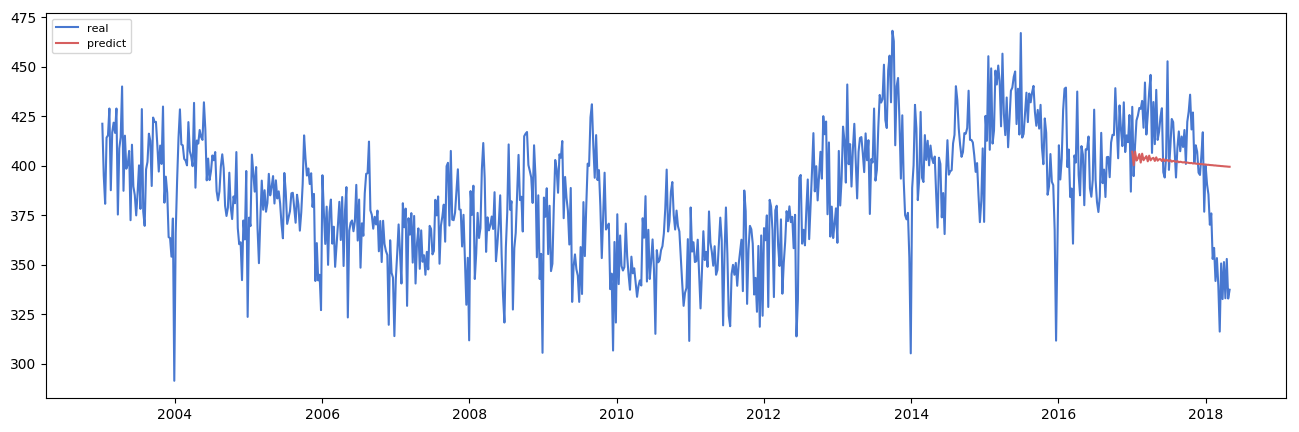

In [0]:
test_pred = best_model.predict(test_start_date, '2018-04-30')

# plt.close()

plt.figure(figsize=(16, 5))
plt.plot(df_week, label='real', c='b')
plt.plot(test_pred, label='predict', c='r')

plt.legend(loc='upper left', fontsize=8)
plt.show()
display()

In [0]:
# MAPE
print('MAPE is {}'.format(np.mean(np.abs(test_pred.values - df_week[df_week.index>=test_start_date].iloc[:,0].values)/np.abs(df_week[df_week.index>=test_start_date].iloc[:,0].values)))) 

MAPE is 0.06303302764962167